$\hspace{95mm}$ <img src="https://drive.google.com/uc?id=1v2mM0flAevZW8GoOCI564cJ2Szz5SPA-" alt="uoa" width="450" height="300">


---
$ $

Special Topics / Quantum Machine Learning
$ $

Panagiota Gyftou, 1115201900318
$ $

June 2024

$ $

---

Define Libraries

In [4]:
!pip install --quiet pennylane
import pennylane as qml

import numpy as np
from pennylane import numpy as np

import os
import pandas as pd

import itertools
from itertools import combinations

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pennylane.optimize import AdamOptimizer, \
                               AdagradOptimizer, \
                               GradientDescentOptimizer, \
                               MomentumOptimizer, \
                               NesterovMomentumOptimizer, \
                               RMSPropOptimizer, \
                               RotosolveOptimizer, \
                               SPSAOptimizer

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read Files & Extract Information

#### Plot Data

1. Read Data

In [5]:
def read_data(myFile, n):

  with open(myFile, 'r') as file:
      lines = file.readlines()

  coordinates = []
  for line in lines:
      coords = line.strip().split('\t')
      coordinates.append(coords)

  if n == 3:
    dataframe = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])

    dataframe['x'] = pd.to_numeric(dataframe['x'])
    dataframe['y'] = pd.to_numeric(dataframe['y'])
    dataframe['z'] = pd.to_numeric(dataframe['z'])
  else:
    dataframe = pd.DataFrame(coordinates, columns=['v', 'w', 'x', 'y', 'z'])

    dataframe['v'] = pd.to_numeric(dataframe['v'])
    dataframe['w'] = pd.to_numeric(dataframe['w'])
    dataframe['x'] = pd.to_numeric(dataframe['x'])
    dataframe['y'] = pd.to_numeric(dataframe['y'])
    dataframe['z'] = pd.to_numeric(dataframe['z'])

  return dataframe

In [6]:
# train set
dataframe_Atrain = read_data("/content/drive/MyDrive/DataQuantumMachineLearning/classA_train.dat", 3)
dataframe_Btrain = read_data("/content/drive/MyDrive/DataQuantumMachineLearning/classB_train.dat", 3)

# test set
dataframe_Atest = read_data("/content/drive/MyDrive/DataQuantumMachineLearning/classA_test.dat", 3)
dataframe_Btest = read_data("/content/drive/MyDrive/DataQuantumMachineLearning/classB_test.dat", 3)

$ $

2. Find the limits for the plot

In [7]:
def findMinMax(dataframe):

  auxiliary = []
  auxiliary.append(min(dataframe['x'].tolist()))
  auxiliary.append(min(dataframe['y'].tolist()))
  auxiliary.append(min(dataframe['z'].tolist()))

  minVal = min(auxiliary)

  auxiliary = []
  auxiliary.append(max(dataframe['x'].tolist()))
  auxiliary.append(max(dataframe['y'].tolist()))
  auxiliary.append(max(dataframe['z'].tolist()))

  maxVal = max(auxiliary)

  return minVal, maxVal


In [8]:
def minmaxVal(dataframe_Atrain, dataframe_Btrain, dataframe_Atest, dataframe_Btest):

  auxiliary_max = []
  auxiliary_min = []

  minVal, maxVal = findMinMax(dataframe_Atrain)
  auxiliary_min.append(minVal)
  auxiliary_max.append(maxVal)

  minVal, maxVal = findMinMax(dataframe_Btrain)
  auxiliary_min.append(minVal)
  auxiliary_max.append(maxVal)

  minVal, maxVal = findMinMax(dataframe_Atest)
  auxiliary_min.append(minVal)
  auxiliary_max.append(maxVal)

  minVal, maxVal = findMinMax(dataframe_Btest)
  auxiliary_min.append(minVal)
  auxiliary_max.append(maxVal)

  return min(auxiliary_min), max(auxiliary_max)

In [9]:
minVal, maxVal = minmaxVal(dataframe_Atrain, dataframe_Btrain, dataframe_Atest, dataframe_Btest)
minVal, maxVal

(-0.0761105302797963, 1.076851867211415)

$ $
3. Plot Data

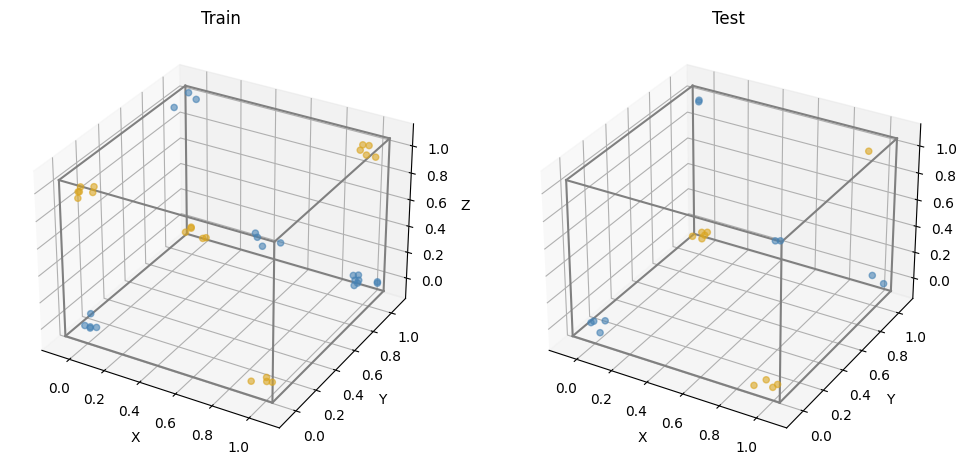

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 20), subplot_kw={'projection':'3d'})

x_coords = dataframe_Atrain['x'].tolist()
y_coords = dataframe_Atrain['y'].tolist()
z_coords = dataframe_Atrain['z'].tolist()

axs[0].scatter(x_coords, y_coords, z_coords, c='steelblue', marker='o', alpha=0.6)

r = [minVal, maxVal]
for s, e in itertools.combinations(np.array(list(itertools.product(r,r,r))), 2):
  if np.sum(np.abs(s-e)) == r[1]-r[0]:
    axs[0].plot3D(*zip(s,e), color="gray")
    axs[1].plot3D(*zip(s,e), color="gray")

x_coords = dataframe_Btrain['x'].tolist()
y_coords = dataframe_Btrain['y'].tolist()
z_coords = dataframe_Btrain['z'].tolist()

axs[0].scatter(x_coords, y_coords, z_coords, c='goldenrod', marker='o', alpha=0.6)

axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_zlabel('Z')
axs[0].set_title('Train')

x_coords = dataframe_Atest['x'].tolist()
y_coords = dataframe_Atest['y'].tolist()
z_coords = dataframe_Atest['z'].tolist()

axs[1].scatter(x_coords, y_coords, z_coords, c='steelblue', marker='o', alpha=0.6)

x_coords = dataframe_Btest['x'].tolist()
y_coords = dataframe_Btest['y'].tolist()
z_coords = dataframe_Btest['z'].tolist()

axs[1].scatter(x_coords, y_coords, z_coords, c='goldenrod', marker='o', alpha=0.6)

axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_zlabel('Z')
axs[1].set_title('Test')

plt.show()


#### Read Data

##### 3 Inputs

In [11]:
# -- Train Set --

# 1. Read Data
data = np.loadtxt("/content/drive/MyDrive/DataQuantumMachineLearning/classA_train.dat", dtype=float)
data_A = np.array(data)

data = np.loadtxt("/content/drive/MyDrive/DataQuantumMachineLearning/classB_train.dat", dtype=float)
data_B = np.array(data)

# 2. Label Encoding
labels_A = np.array([1 for _ in range(len(data))])
labels_B = np.array([-1 for _ in range(len(data))])

# 3. Combine data
X = np.concatenate((data_A, data_B), axis=0)
Y = np.concatenate((labels_A, labels_B), axis=0)


# -----------------


# -- Test Set --

# 1. Read Data
data = np.loadtxt("/content/drive/MyDrive/DataQuantumMachineLearning/classA_test.dat", dtype=float)
data_A = np.array(data)

data = np.loadtxt("/content/drive/MyDrive/DataQuantumMachineLearning/classB_test.dat", dtype=float)
data_B = np.array(data)

# 2. Label Encoding
labels_A = np.array([1 for _ in range(len(data))])
labels_B = np.array([-1 for _ in range(len(data))])


# 3. Combine data
X_test = np.concatenate((data_A, data_B), axis=0)
Y_test = np.concatenate((labels_A, labels_B), axis=0)

##### 5 Inputs

In [12]:
# -- Train Set --

# 1. Read Data
data = np.loadtxt("/content/drive/MyDrive/DataQuantumMachineLearning/classA_train_N5.dat", dtype=float)
data_A = np.array(data)

data = np.loadtxt("/content/drive/MyDrive/DataQuantumMachineLearning/classB_train_N5.dat", dtype=float)
data_B = np.array(data)

# 2. Label Encoding
labels_A = np.array([1 for _ in range(len(data))])
labels_B = np.array([-1 for _ in range(len(data))])

# 3. Combine data
X5 = np.concatenate((data_A, data_B), axis=0)
Y5 = np.concatenate((labels_A, labels_B), axis=0)


# -----------------


# -- Test Set --

# 1. Read Data
data = np.loadtxt("/content/drive/MyDrive/DataQuantumMachineLearning/classA_test_N5.dat", dtype=float)
data_A = np.array(data)

data = np.loadtxt("/content/drive/MyDrive/DataQuantumMachineLearning/classB_test_N5.dat", dtype=float)
data_B = np.array(data)

# 2. Label Encoding
labels_A = np.array([1 for _ in range(len(data))])
labels_B = np.array([-1 for _ in range(len(data))])


# 3. Combine data
X5_test = np.concatenate((data_A, data_B), axis=0)
Y5_test = np.concatenate((labels_A, labels_B), axis=0)

#### Data processing

*    Reduce size (-0.5)

In [13]:
# --- 3 inputs ---
X = np.array([[item-0.5 for item in data] for data in X])
X_test = np.array([[item-0.5 for item in data] for data in X_test])

# --- 5 inputs ---
X5 = np.array([[item-0.5 for item in data] for data in X5])
X5_test = np.array([[item-0.5 for item in data] for data in X5_test])

$ $

*    Standarization

In [14]:
# --- 3 inputs ---
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)
X_test = std_scale.transform(X_test)

# --- 5 inputs ---
std_scale = StandardScaler().fit(X5)
X5 = std_scale.transform(X5)
X5_test = std_scale.transform(X5_test)

### 1. Quantum Machine Learning - 3 inputs

$ $

*   Define quantum model



In [15]:
numQubits = 3
device = qml.device("default.qubit", wires=numQubits)

In [16]:
def data_encoding(x, numQubits):
    qml.AngleEmbedding(features=x, wires=range(numQubits), rotation='Y')


@qml.qnode(qml.device('default.qubit', wires=numQubits))
def circuit(weights, x, numQubits):
    """
    quantum circuit
    """
    # Data encoding
    data_encoding(x, numQubits)

    # Quantum information processing
    layers = weights.shape[0]
    for layer in range(layers):
         # Apply rotations
        for qubit in range(numQubits):
            qml.RX(weights[layer, qubit, 0], wires=qubit)
            qml.RY(weights[layer, qubit, 1], wires=qubit)
            qml.RZ(weights[layer, qubit, 2], wires=qubit)

         # Apply entangling CNOT gates
        for qubit in range(numQubits):
            qml.CNOT(wires=[qubit, (qubit + 1) % numQubits])

    return qml.expval(qml.PauliZ(0))



def variational_classifier(weights, bias, x, numQubits):
    """
    variational classifier
    """
    return circuit(weights, x, numQubits) + bias


# -------------------------------------------------------------
# -------------         loss functions        -----------------
# -------------------------------------------------------------

#  1. MSE
def mean_square_loss(labels, predictions):
    return np.mean((labels - qml.numpy.stack(predictions)) ** 2)

#  2. RMSE
def root_mean_squared_error(labels, predictions):
    mse = np.mean((labels - qml.math.stack(predictions)) ** 2)
    return np.sqrt(mse)

#  3. MAE
def mean_absolute_error(labels, predictions):
    return np.mean(np.abs(labels - qml.numpy.stack(predictions)))

#  4. MAPE
def mean_absolute_percentage_error(labels, predictions):

    labels = qml.math.stack(labels)
    predictions = qml.math.stack(predictions)

    return np.mean(np.abs((labels - predictions) / labels))

# -------------------------------------------------------------
# -------------------------------------------------------------


def accuracy(labels, predictions):
    """
    accuracy function
    """
    labels = np.array(labels)
    predictions = np.array(predictions)

    correct_predictions = 0
    for i in range(len(predictions)):
          if predictions[i] == labels[i]:
              correct_predictions += 1
    total_predictions = len(predictions)

    return correct_predictions / total_predictions


def cost(weights, bias, X, Y, numQubits, loss_fn):
    """
    cost function
    """

    predictions = [variational_classifier(weights, bias, x, numQubits) for x in X]

    match loss_fn:
        case "MAE":
            return mean_absolute_error(Y, predictions)
        case "MSE":
           return mean_square_loss(Y, predictions)
        case "RMSE":
            return root_mean_squared_error(Y, predictions)
        case _:
            return mean_absolute_percentage_error(Y, predictions)



$ $

*    Run quatum model

In [17]:
num_layers = 5
weights = 0.01 * np.random.randn(num_layers, numQubits, 3, requires_grad=True)
bias = 0.0   # The grading term allows the model's output to align with the data by adding a linear shift to the final prediction.
batch_size = 10

optimizer = AdamOptimizer(stepsize=0.1)

best_acc = 0.0
best_weights = weights
best_bias = bias
best_cost = float("inf")
for it in range(20):

      batch_index = np.random.randint(0, len(X), (batch_size,))
      X_batch = X[batch_index]
      Y_batch = Y[batch_index]

      weights, bias = optimizer.step(cost, weights, bias, X=X_batch, Y=Y_batch, numQubits=numQubits, loss_fn="MSE")

      predictions = [np.sign(variational_classifier(weights, bias, x, numQubits)) for x in X]
      current_cost = cost(weights, bias, X, Y, numQubits, "MSE")
      acc = accuracy(Y, predictions)

      print(f"Epoch: {it+1:4d} | Cost: {current_cost:0.7f} | Accuracy: {acc:0.3f}")

       # check and save the current best training period
      if (best_acc < acc):
            best_epoch = it
            best_acc = acc
            best_cost = current_cost
            best_weights = weights
            best_bias = bias
      elif (best_acc == acc):
        if(best_cost > current_cost):
            best_epoch = it
            best_acc = acc
            best_cost = current_cost
            best_weights = weights
            best_bias = bias


print(f"\n New Best Accuracy: {best_acc:0.3f}")
print(f"     Epoch: {best_epoch+1}")
print(f"     Cost: {best_cost}")


Epoch:    1 | Cost: 1.1431829 | Accuracy: 0.600
Epoch:    2 | Cost: 1.1046703 | Accuracy: 0.700
Epoch:    3 | Cost: 1.0203333 | Accuracy: 0.550
Epoch:    4 | Cost: 0.9457406 | Accuracy: 0.700
Epoch:    5 | Cost: 0.9143187 | Accuracy: 0.625
Epoch:    6 | Cost: 0.8770933 | Accuracy: 0.500
Epoch:    7 | Cost: 0.8402893 | Accuracy: 0.575
Epoch:    8 | Cost: 0.8159164 | Accuracy: 0.600
Epoch:    9 | Cost: 0.7500518 | Accuracy: 0.600
Epoch:   10 | Cost: 0.6654704 | Accuracy: 0.750
Epoch:   11 | Cost: 0.5943093 | Accuracy: 0.800
Epoch:   12 | Cost: 0.5220889 | Accuracy: 0.800
Epoch:   13 | Cost: 0.4690296 | Accuracy: 0.925
Epoch:   14 | Cost: 0.4406581 | Accuracy: 0.925
Epoch:   15 | Cost: 0.4276358 | Accuracy: 0.925
Epoch:   16 | Cost: 0.4225640 | Accuracy: 1.000
Epoch:   17 | Cost: 0.4150052 | Accuracy: 1.000
Epoch:   18 | Cost: 0.4084918 | Accuracy: 1.000
Epoch:   19 | Cost: 0.3994135 | Accuracy: 1.000
Epoch:   20 | Cost: 0.3799587 | Accuracy: 1.000

 New Best Accuracy: 1.000
     Epoch: 2

$ $

*    Extract Prediction

In [18]:
predictions_test = [np.sign(variational_classifier(best_weights, best_bias, x, numQubits)) for x in X_test]

print("\nCheck accuracy on test set:\n")
print(f"\tlabels\t\tprediction \t \t \t\t data \t")
print(f"============================================================================================")
[print(f"\t  {y} \t\t   {int(p)}\t\t\t{x}") for x, y, p in zip(X_test, Y_test, predictions_test)]

acc_test = accuracy(Y_test, predictions_test)
print(f"\nAccuracy {acc_test}")


Check accuracy on test set:

	labels		prediction 	 	 		 data 	
	  1 		   1			[ 0.95197323  1.01029423 -0.84351581]
	  1 		   1			[-1.05536561 -1.0667344  -0.85861525]
	  1 		   1			[ 0.96220019 -1.00316428  1.07216638]
	  1 		   1			[ 1.09131424  0.99490882 -0.9071379 ]
	  1 		   1			[-1.12333815 -1.01740866 -0.94507782]
	  1 		   1			[-0.97252204 -1.08281569 -0.98928389]
	  1 		   1			[-1.09500526  0.99037318  1.12980816]
	  1 		   1			[ 1.03639814 -1.03896133  1.12524777]
	  1 		   1			[-1.05125198  0.91569889  1.16373247]
	  1 		   1			[-0.99909214 -0.95070804 -0.91472883]
	  -1 		   -1			[ 1.00712647 -1.1020594  -0.9632989 ]
	  -1 		   -1			[-1.06753684  0.97826276 -0.91181094]
	  -1 		   -1			[-1.09258991  0.83373292 -0.88691384]
	  -1 		   -1			[ 0.81158921 -1.12135021 -1.00362329]
	  -1 		   -1			[ 1.02369453 -1.03975327 -0.96094069]
	  -1 		   -1			[-0.97751375  0.89136849 -0.86466696]
	  -1 		   -1			[-1.02426612  0.91075186 -0.95318893]
	  -1 		   -1			[-0.98346947  0.953892

## 2. Compare different classical optimization methods and/or loss functions


*    Definition of the training process

In [19]:
def training(numQubits, loss_fn, opt):

    num_layers = 5
    weights = 0.01 * np.random.randn(num_layers, numQubits, 3, requires_grad=True)
    bias = 0.0 # The grading term allows the model's output to align with the data by adding a linear shift to the final prediction.
    batch_size = 10

    match opt:
        case "AdamOptimizer":
            optimizer = AdamOptimizer(stepsize=0.1)
        case "AdagradOptimizer":
            optimizer = AdagradOptimizer(stepsize=0.1)
        case "GradientDescentOptimizer":
            optimizer = GradientDescentOptimizer(stepsize=0.1)
        case "MomentumOptimizer":
            optimizer = MomentumOptimizer(stepsize=0.1)
        case "NesterovMomentumOptimizer":
            optimizer = NesterovMomentumOptimizer(stepsize=0.1)
        case "RMSPropOptimizer":
            optimizer = RMSPropOptimizer(stepsize=0.1)
        case "RotosolveOptimizer":
            optimizer = RotosolveOptimizer(stepsize=0.1)
        case _:
            optimizer = SPSAOptimizer(stepsize=0.1)

    best_acc = 0.0
    best_weights = weights
    best_bias = bias
    best_cost = float("inf")
    for epoch in range(20):

        batch_index = np.random.randint(0, len(X), (batch_size,))
        X_batch = X[batch_index]
        Y_batch = Y[batch_index]

        weights, bias = optimizer.step(cost, weights, bias, X=X_batch, Y=Y_batch, numQubits=numQubits, loss_fn=loss_fn)

        predictions = [np.sign(variational_classifier(weights, bias, x, numQubits)) for x in X]
        current_cost = cost(weights, bias, X, Y, numQubits, loss_fn)
        acc = accuracy(Y, predictions)

        print(f"Epoch: {epoch+1:4d} | Cost: {current_cost:0.7f} | Accuracy: {acc:0.3f}")

         # check and save the current best training period
        if (best_acc < acc):
              best_epoch = epoch
              best_acc = acc
              best_cost = current_cost
              best_weights = weights
              best_bias = bias
        elif (best_acc == acc):
          if(best_cost > current_cost):
              best_epoch = epoch
              best_acc = acc
              best_cost = current_cost
              best_weights = weights
              best_bias = bias

    return best_acc, best_epoch, best_weights, best_bias, best_cost

$ $

*    Experiments

In [20]:
optimizers= ["AdamOptimizer", "AdagradOptimizer", "GradientDescentOptimizer", "MomentumOptimizer", "NesterovMomentumOptimizer", "RMSPropOptimizer"]
loss_functions = ["MAE", "MSE", "RMSE", "MAPE"]

best_acc = 0.0
best_acc_test = 0.0
best_optimizer = optimizers[0]
best_loss = loss_functions[0]
best_cost = float("inf")
for optimizer in optimizers:

    for loss_fn in loss_functions:

        print(f"- - Optimizer: {optimizer}")
        print(f"- - Loss function: {loss_fn}\n")

        # training
        acc, epoch, weights, bias, current_cost = training(numQubits, loss_fn, optimizer)

        # check and save the current best training period
        if (best_acc < acc):
              best_epoch = epoch
              best_acc = acc
              best_cost = current_cost
              best_optimizer = optimizer
              best_loss = loss_fn
              best_weights = weights
              best_bias = bias
        elif (best_acc == acc):
          if(best_cost > current_cost):
              best_epoch = epoch
              best_acc = acc
              best_cost = current_cost
              best_optimizer = optimizer
              best_loss = loss_fn
              best_weights = weights
              best_bias = bias


        print(f"\n Last Best Accuracy: {best_acc:0.3f}")
        print(f"     Epoch: {best_epoch+1}")
        print(f"     Cost: {best_cost}")
        print(f"     Optimizer: {best_optimizer}")
        print(f"     Loss function: {best_loss}\n")
        print("\n-------------------\n\n")





- - Optimizer: AdamOptimizer
- - Loss function: MAE

Epoch:    1 | Cost: 1.0097193 | Accuracy: 0.525
Epoch:    2 | Cost: 0.9924598 | Accuracy: 0.500
Epoch:    3 | Cost: 0.9825654 | Accuracy: 0.550
Epoch:    4 | Cost: 0.9731352 | Accuracy: 0.650
Epoch:    5 | Cost: 0.9702845 | Accuracy: 0.650
Epoch:    6 | Cost: 0.9498845 | Accuracy: 0.625
Epoch:    7 | Cost: 0.9108552 | Accuracy: 0.575
Epoch:    8 | Cost: 0.8691852 | Accuracy: 0.575
Epoch:    9 | Cost: 0.8242880 | Accuracy: 0.575
Epoch:   10 | Cost: 0.7813630 | Accuracy: 0.575
Epoch:   11 | Cost: 0.7406956 | Accuracy: 0.600
Epoch:   12 | Cost: 0.7232405 | Accuracy: 0.800
Epoch:   13 | Cost: 0.7128556 | Accuracy: 0.800
Epoch:   14 | Cost: 0.6986807 | Accuracy: 0.875
Epoch:   15 | Cost: 0.6909061 | Accuracy: 0.875
Epoch:   16 | Cost: 0.6853641 | Accuracy: 0.875
Epoch:   17 | Cost: 0.6812630 | Accuracy: 0.875
Epoch:   18 | Cost: 0.6655342 | Accuracy: 1.000
Epoch:   19 | Cost: 0.6461493 | Accuracy: 1.000
Epoch:   20 | Cost: 0.6239355 | Acc

$ $

*  Extract Predictions

In [21]:
predictions_test = [np.sign(variational_classifier(best_weights, best_bias, x, numQubits)) for x in X_test]

print("\nCheck accuracy on test set:\n")
print(f"\tlabels\t\tprediction \t \t \t\t data \t")
print(f"============================================================================================")
[print(f"\t  {y} \t\t   {int(p)}\t\t\t{x}") for x, y, p in zip(X_test, Y_test, predictions_test)]

acc_test = accuracy(Y_test, predictions_test)
print(f"\nAccuracy: {acc_test}\n")


Check accuracy on test set:

	labels		prediction 	 	 		 data 	
	  1 		   1			[ 0.95197323  1.01029423 -0.84351581]
	  1 		   1			[-1.05536561 -1.0667344  -0.85861525]
	  1 		   1			[ 0.96220019 -1.00316428  1.07216638]
	  1 		   1			[ 1.09131424  0.99490882 -0.9071379 ]
	  1 		   1			[-1.12333815 -1.01740866 -0.94507782]
	  1 		   1			[-0.97252204 -1.08281569 -0.98928389]
	  1 		   1			[-1.09500526  0.99037318  1.12980816]
	  1 		   1			[ 1.03639814 -1.03896133  1.12524777]
	  1 		   1			[-1.05125198  0.91569889  1.16373247]
	  1 		   1			[-0.99909214 -0.95070804 -0.91472883]
	  -1 		   -1			[ 1.00712647 -1.1020594  -0.9632989 ]
	  -1 		   -1			[-1.06753684  0.97826276 -0.91181094]
	  -1 		   -1			[-1.09258991  0.83373292 -0.88691384]
	  -1 		   -1			[ 0.81158921 -1.12135021 -1.00362329]
	  -1 		   -1			[ 1.02369453 -1.03975327 -0.96094069]
	  -1 		   -1			[-0.97751375  0.89136849 -0.86466696]
	  -1 		   -1			[-1.02426612  0.91075186 -0.95318893]
	  -1 		   -1			[-0.98346947  0.953892

## 3. Quantum Machine Learning - 5 inputs

In [22]:
# Data encoding function
def data_encoding(x, numQubits):

    qml.AngleEmbedding(features=x[:numQubits], wires=range(numQubits), rotation='Y')
    qml.AngleEmbedding(features=x[numQubits:], wires=range(numQubits), rotation='X')


@qml.qnode(qml.device('default.qubit', wires=numQubits))
def circuit(weights, x, numQubits):
    """
    quantum circuit
    """
    # Data encoding
    data_encoding(x, numQubits)

    # Quantum information processing
    layers = weights.shape[0]
    for layer in range(layers):
         # Apply rotations
        for qubit in range(numQubits):
            qml.RX(weights[layer, qubit, 0], wires=qubit)
            qml.RY(weights[layer, qubit, 1], wires=qubit)
            qml.RZ(weights[layer, qubit, 2], wires=qubit)

         # Apply entangling CNOT gates
        for qubit in range(numQubits):
            qml.CNOT(wires=[qubit, (qubit + 1) % numQubits])

    return qml.expval(qml.PauliZ(0))



def variational_classifier(weights, bias, x, numQubits):
    """
    variational classifier
    """
    return circuit(weights, x, numQubits) + bias


# -------------------------------------------------------------
# -------------         loss functions        -----------------
# -------------------------------------------------------------

#  1. MSE
def mean_square_loss(labels, predictions):
    return np.mean((labels - qml.numpy.stack(predictions)) ** 2)

#  2. RMSE
def root_mean_squared_error(labels, predictions):
    mse = np.mean((labels - qml.math.stack(predictions)) ** 2)
    return np.sqrt(mse)

#  3. MAE
def mean_absolute_error(labels, predictions):
    return np.mean(np.abs(labels - qml.numpy.stack(predictions)))

#  4. MAPE
def mean_absolute_percentage_error(labels, predictions):

    labels = qml.math.stack(labels)
    predictions = qml.math.stack(predictions)

    return np.mean(np.abs((labels - predictions) / labels))

# -------------------------------------------------------------
# -------------------------------------------------------------


def accuracy(labels, predictions):
    """
    accuracy function
    """
    labels = np.array(labels)
    predictions = np.array(predictions)

    correct_predictions = 0
    for i in range(len(predictions)):
          if predictions[i] == labels[i]:
              correct_predictions += 1
    total_predictions = len(predictions)

    return correct_predictions / total_predictions


def cost(weights, bias, X, Y, numQubits, loss_fn):
    """
    cost function
    """

    predictions = [variational_classifier(weights, bias, x, numQubits) for x in X]

    match loss_fn:
        case "MAE":
            return mean_absolute_error(Y, predictions)
        case "MSE":
           return mean_square_loss(Y, predictions)
        case "RMSE":
            return root_mean_squared_error(Y, predictions)
        case _:
            return mean_absolute_percentage_error(Y, predictions)




*    Run quatum model

In [23]:
match best_optimizer:
    case "AdamOptimizer":
        optimizer = AdamOptimizer(stepsize=0.1)
    case "AdagradOptimizer":
        optimizer = AdagradOptimizer(stepsize=0.1)
    case "GradientDescentOptimizer":
        optimizer = GradientDescentOptimizer(stepsize=0.1)
    case "MomentumOptimizer":
        optimizer = MomentumOptimizer(stepsize=0.1)
    case "NesterovMomentumOptimizer":
        optimizer = NesterovMomentumOptimizer(stepsize=0.1)
    case "RMSPropOptimizer":
        optimizer = RMSPropOptimizer(stepsize=0.1)
    case "RotosolveOptimizer":
        optimizer = RotosolveOptimizer(stepsize=0.1)
    case _:
        optimizer = SPSAOptimizer(stepsize=0.1)

num_layers = 5
weights = 0.01 * np.random.randn(num_layers, numQubits, 3, requires_grad=True)
bias = 0.0 # The grading term allows the model's output to align with the data by adding a linear shift to the final prediction.
batch_size = 10

best_acc = 0.0
best_weights = weights
best_bias = bias
best_cost = float("inf")
for epoch in range(50):

      batch_index = np.random.randint(0, len(X5), (batch_size,))
      X_batch = X5[batch_index]
      Y_batch = Y5[batch_index]

      weights, bias = optimizer.step(cost, weights, bias, X=X_batch, Y=Y_batch, numQubits=numQubits, loss_fn=best_loss)

      predictions = [np.sign(variational_classifier(weights, bias, x, numQubits)) for x in X5]
      current_cost = cost(weights, bias, X5, Y5, numQubits, best_loss)
      acc = accuracy(Y5, predictions)

      print(f"Epoch: {epoch+1:4d} | Cost: {current_cost:0.7f} | Accuracy: {acc:0.3f}")

      if (best_acc < acc):
            best_epoch = epoch
            best_acc = acc
            best_cost = current_cost
            best_weights = weights
            best_bias = bias
      elif (best_acc == acc):
        if(best_cost > current_cost):
            best_epoch = epoch
            best_acc = acc
            best_cost = current_cost
            best_weights = weights
            best_bias = bias


print(f"\n New Best Accuracy: {best_acc:0.3f}")
print(f"     Epoch: {best_epoch+1}")
print(f"     Cost: {best_cost}")


Epoch:    1 | Cost: 1.0866344 | Accuracy: 0.556
Epoch:    2 | Cost: 1.0928256 | Accuracy: 0.487
Epoch:    3 | Cost: 1.0943422 | Accuracy: 0.456
Epoch:    4 | Cost: 1.0672617 | Accuracy: 0.525
Epoch:    5 | Cost: 1.0649131 | Accuracy: 0.431
Epoch:    6 | Cost: 1.1068411 | Accuracy: 0.525
Epoch:    7 | Cost: 1.1412938 | Accuracy: 0.481
Epoch:    8 | Cost: 1.0778417 | Accuracy: 0.475
Epoch:    9 | Cost: 1.0932933 | Accuracy: 0.487
Epoch:   10 | Cost: 1.1506634 | Accuracy: 0.481
Epoch:   11 | Cost: 1.1420734 | Accuracy: 0.494
Epoch:   12 | Cost: 1.1072918 | Accuracy: 0.419
Epoch:   13 | Cost: 1.0210481 | Accuracy: 0.550
Epoch:   14 | Cost: 1.0286926 | Accuracy: 0.531
Epoch:   15 | Cost: 1.0747605 | Accuracy: 0.613
Epoch:   16 | Cost: 1.1517038 | Accuracy: 0.519
Epoch:   17 | Cost: 1.1980560 | Accuracy: 0.494
Epoch:   18 | Cost: 1.1839681 | Accuracy: 0.456
Epoch:   19 | Cost: 1.1348729 | Accuracy: 0.469
Epoch:   20 | Cost: 1.1417744 | Accuracy: 0.519
Epoch:   21 | Cost: 1.1373207 | Accuracy

$ $

*    Extract Predictions

In [24]:
predictions_test = [np.sign(variational_classifier(best_weights, best_bias, x, numQubits)) for x in X5_test]

print("\nCheck accuracy on test set:\n")
print(f"\tlabels\t\tprediction \t \t \t\t data \t")
print(f"============================================================================================")
[print(f"\t  {y} \t\t   {int(p)}\t\t\t{x}") for x, y, p in zip(X5_test, Y5_test, predictions_test)]

acc_test = accuracy(Y5_test, predictions_test)
print(f"\nAccuracy: {acc_test}")


Check accuracy on test set:

	labels		prediction 	 	 		 data 	
	  1 		   1			[ 0.99537949  1.03574711 -1.10360694  1.09058715  1.13238037]
	  1 		   -1			[ 1.04233365  1.01206838  0.89115486  1.08020589 -0.90562305]
	  1 		   -1			[-0.9942626  -0.95315347  0.83942234  1.08755445 -0.93233429]
	  1 		   -1			[ 0.95818863  0.98658876  0.96175227  1.09396107 -0.93921819]
	  1 		   -1			[-1.03572739  0.99575758  0.88686835 -0.95223195 -0.90011601]
	  1 		   -1			[-1.05807285 -0.88976361  0.90387485 -0.9417232   1.10494168]
	  1 		   -1			[ 0.98128739  1.03942336 -1.17181998 -0.97506704 -0.91382604]
	  1 		   -1			[-0.97666779 -0.97397587  0.91200384 -1.04770222  1.03820577]
	  1 		   1			[ 0.99468151  1.0555869  -1.09430749  1.06413302  1.03527852]
	  1 		   -1			[ 1.01246786 -0.93111513  0.88775121 -0.88148576 -0.96637649]
	  1 		   1			[ 1.02787885 -0.92404644 -1.02800523  1.06293583 -0.91450775]
	  1 		   -1			[ 1.00742477  1.01314342  0.93632064 -0.94790444  1.07184015]
	  1 		   1			[